In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor


In [2]:
df = pd.read_csv('restaurant_data.csv')
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


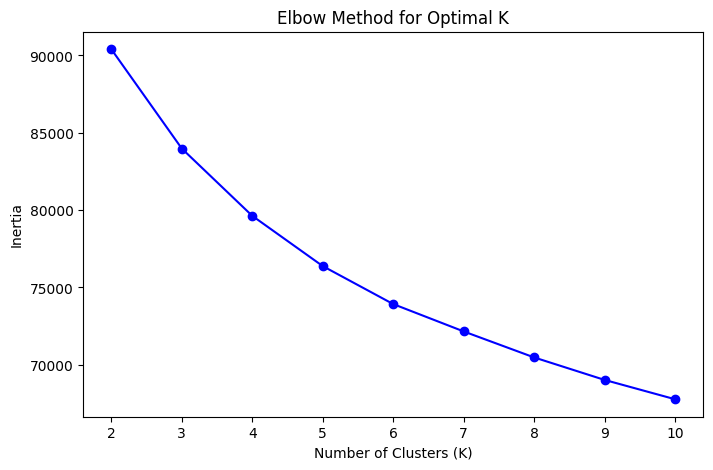

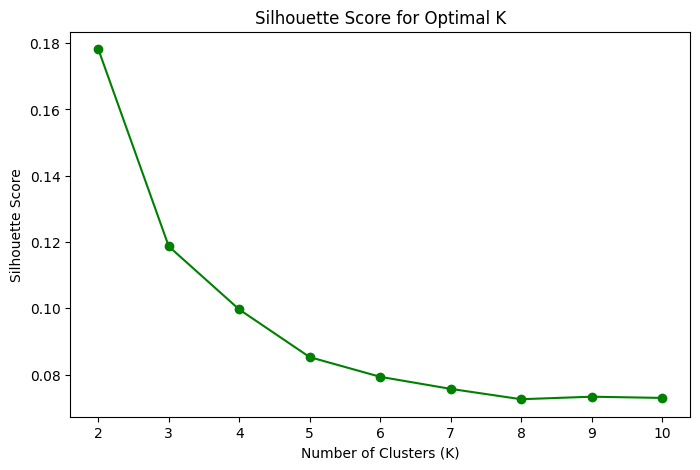

📌 התפלגות המסעדות לפי אשכולות:
Cluster
0    4130
1    2448
2    1790
Name: count, dtype: int64


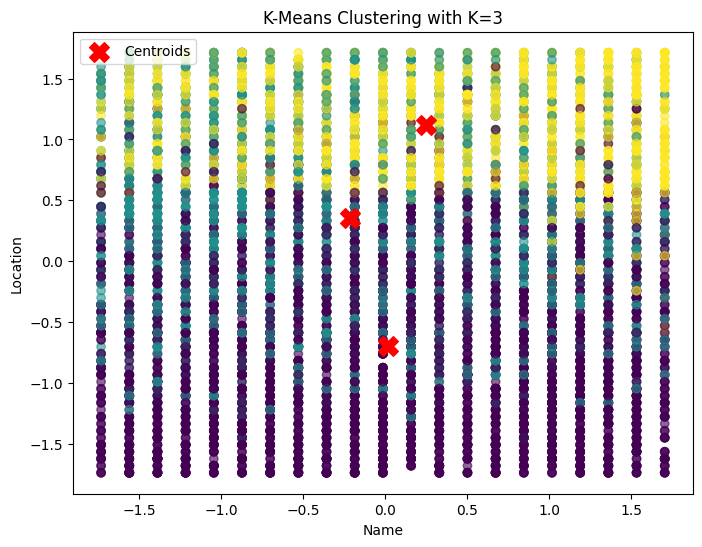

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# שלב 1: טעינת הנתונים

df = pd.read_csv('restaurant_data.csv')

# שלב 2: בחירת מטריצת X - עמודות מספריות בלבד
X = df.select_dtypes(include=['number']).copy()

# שלב 3: טיפול בערכים חסרים (נמלא בממוצע של כל עמודה)
X.fillna(X.mean(), inplace=True)

# שלב 4: נורמליזציה של הנתונים
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# שלב 5: מציאת מספר האשכולות האופטימלי

# א. שיטת המרפק (Elbow Method)
inertia = []
K_range = range(2, 11)  # נבדוק בין 2 ל-10 אשכולות

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# הצגת גרף Elbow Method
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# ב. שיטת Silhouette Score
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# הצגת גרף Silhouette Score
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()

# שלב 6: בחירת K סופי (נניח לפי תוצאות ה-Elbow)
optimal_k = 3  # נבחר ידנית לפי הגרפים

# הפעלת K-Means עם מספר אשכולות אופטימלי
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

# הוספת האשכולות לנתונים
X["Cluster"] = clusters

# הצגת התפלגות המסעדות בכל אשכול
print("📌 התפלגות המסעדות לפי אשכולות:")
print(X["Cluster"].value_counts())

# שלב 7: הצגת גרף האשכולות על בסיס שני משתנים ראשונים
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title(f"K-Means Clustering with K={optimal_k}")
plt.legend()
plt.show()


הK הטוב ביותר שהתקבל בשתי השיטות הוא 3.
בשיטת המרפק הוא נקבע מתי שהירידה נהייתה פחות חדה.
בשיטת silhouette score הוא נקבע על ידי כמה הוא קרוב ל1 כי כך יודעים שהאשכולות נפרדים היטב.


ביחס לנתונים שלי קיבוץ אשדכולות כזה יכול לעזור בזיהוי סוגי מסעדות על פי נתונים פיננסים ודירוגים שונים למשל אם זה מסעדות יוקרה או מסעדות עממיות.
השימוש הכלכלי בעולם האמיתי של מודל זה הוא למדוד את רווח המסעדה ועל פי זה לקטלג את המסעדה בקטגוריה המתאימה לה.
